<a href="https://colab.research.google.com/github/ChhaSahil/Stock_SQL/blob/main/SQL_on_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSE Stock Portfolio Analysis using SQL

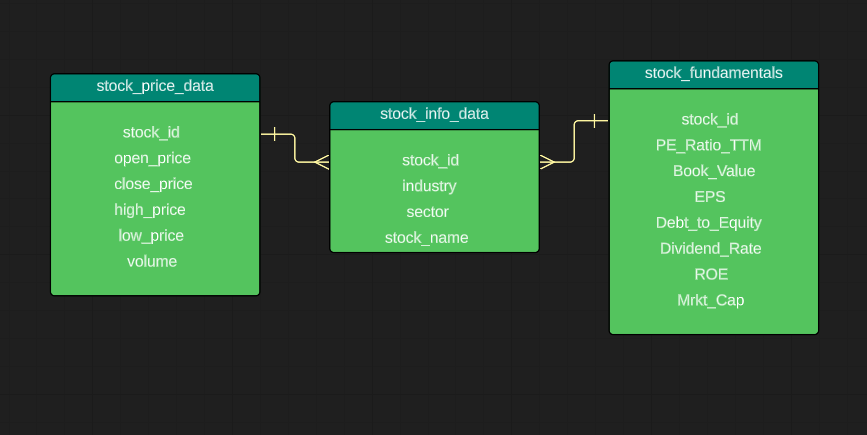

### Our Portfolio consists of 24 stocks showcasing diversity in terms of <i>Industries</i> and <i>Market values</i>.
### Our aim : To implement various SQL functions to answer different questions related to our portfolio.
### Tools and Languages Used : Jupyter Notebook, LucidCharts, DBeaver Airflow, Docker, VSCode, Python, SQL
### <b>About Data Collection and Pipeline : I have used yfinance library as a tool to extract the information about our portfolio's stocks which was inserted into tables using Postgres Database. We have automated the extraction of everyday prices using Aiflow which we are using through Docker. Our pipeline directly updates the data into the database and this we have started from 20th June 2023. Prior data we have added for our questions purpose.</b>

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import psycopg2

import warnings
warnings.filterwarnings('ignore')

### Creating a connection

In [ ]:
conn = psycopg2.connect(
    host='host.docker.internal',
    port=5432,
    dbname='airflow',
    user='airflow',
    password='airflow'
)

cursor = conn.cursor()

### Let's look at the tables

In [ ]:
stock_price_data = pd.read_sql('select * from stock_price_data2', con = conn)
stock_info_data = pd.read_sql('select * from stock_info_data',con = conn)
stock_fundamentals = pd.read_sql('select * from stock_fundamentals', con = conn)

In [ ]:
stock_price_data

,stock_id,datetime,stock_name,open_price,close_price,high_price,low_price,volume
0,TATASTEEL.NS,2023-05-23,Tata Steel Limited,101.77814005383296,102.26233673095703,102.6981181733217,101.68130219605912,21304034.0
1,TATASTEEL.NS,2023-05-24,Tata Steel Limited,101.77813925480281,101.8749771118164,102.45601903040769,101.58446354077566,28454367.0
2,TATASTEEL.NS,2023-05-25,Tata Steel Limited,101.68130173990218,101.53604125976562,101.87497745458097,101.00342935027146,25885062.0
3,TATASTEEL.NS,2023-05-26,Tata Steel Limited,101.68129624558503,103.03704833984375,103.37598451634479,101.63287362540437,28362042.0
4,TATASTEEL.NS,2023-05-29,Tata Steel Limited,103.61808755379445,105.02225494384766,105.40961375814834,102.94021516995942,41062311.0
...,...,...,...,...,...,...,...,...
571,SAIL.NS,2023-06-19,Steel Authority of India Limited,85.5999984741211,85.9000015258789,86.44999694824219,85.19999694824219,16961035.0
572,SAIL.NS,2023-06-20,Steel Authority of India Limited,85.75,86.0,87.05000305175781,85.3499984741211,18507799.0
573,SAIL.NS,2023-06-21,Steel Authority of India Limited,86.05000305175781,85.8499984741211,86.44999694824219,85.0,12679704.0
574,SAIL.NS,2023-06-22,Steel Authority of India Limited,85.6500015258789,85.1500015258789,86.0999984741211,84.5,10984829.0


In [ ]:
stock_info_data

,stock_id,industry,sector
0,TATASTEEL.NS,Steel,Basic Materials
1,CIPLA.NS,Drug Manufacturers—General,Healthcare
2,BHARTIARTL.NS,Telecom Services,Communication Services
3,SAIL.NS,Steel,Basic Materials
4,SYNGENE.NS,Biotechnology,Healthcare
5,INDUSTOWER.NS,Telecom Services,Communication Services
6,AXISBANK.NS,Banks—Regional,Financial Services
7,JUBLFOOD.NS,Restaurants,Consumer Cyclical
8,SONATSOFTW.NS,Information Technology Services,Technology
9,TCS.NS,Information Technology Services,Technology


In [ ]:
stock_fundamentals

,stock_id,pe_ratio_ttm,book_value,eps,debt_to_equity,dividend_rate,roe,mrkt_cap
0,JSWSTEEL.NS,43.578518,273.251,17.13,120.628,3.40,0.06106,1.798856e+12
1,NESTLEIND.NS,85.972565,255.059,262.14,11.118,NaN,NaN,2.172906e+12
2,MARICO.NS,52.534790,29.436,10.06,15.369,4.50,0.35919,6.834456e+11
3,HINDALCO.NS,9.009705,426.647,45.34,69.530,4.00,0.11671,9.113145e+11
4,JUBLFOOD.NS,89.672290,30.700,5.34,125.319,1.20,0.17683,3.159668e+11
5,TATACONSUM.NS,64.531850,175.205,13.03,9.342,8.45,0.07900,7.811597e+11
6,VBL.NS,59.387596,39.276,12.90,74.467,NaN,NaN,1.019970e+12
7,TCS.NS,27.897911,247.124,115.29,8.429,96.00,0.46730,1.184038e+13
8,TECHM.NS,20.441635,316.546,54.57,9.650,32.00,0.17416,1.086970e+12
9,INDUSTOWER.NS,21.731543,78.306,7.45,90.883,NaN,0.09431,4.441078e+11


### Let's look at the datatypes of the all columns of each table

In [ ]:
print('Table----stock_price_data' )
pd.read_sql("select column_name,data_type from information_schema.columns where table_schema = 'public' and table_name = 'stock_price_data2'",con=conn)

Table----stock_price_data


,column_name,data_type
0,stock_id,character varying
1,datetime,character varying
2,stock_name,character varying
3,open_price,character varying
4,close_price,character varying
5,high_price,character varying
6,low_price,character varying
7,volume,character varying


In [ ]:
print('Table----stock_info_data')
pd.read_sql("select column_name, data_type from information_schema.columns where table_schema = 'public' and table_name = 'stock_info_data'",con = conn)

Table----stock_info_data


,column_name,data_type
0,stock_id,character varying
1,industry,character varying
2,sector,character varying


In [ ]:
print('Table----stock_fundamentals')
pd.read_sql("select column_name, data_type from information_schema.columns where table_schema = 'public' and table_name = 'stock_fundamentals'",con = conn)

Table----stock_fundamentals


,column_name,data_type
0,stock_id,character varying
1,pe_ratio_ttm,character varying
2,book_value,character varying
3,eps,character varying
4,debt_to_equity,character varying
5,dividend_rate,character varying
6,roe,character varying
7,mrkt_cap,character varying


## Data Processing

We have column stock_name in wrong table according to the ER diagram and our data types are also not correct for most of the columns

In [ ]:
cursor.execute('''alter table stock_info_data add column stock_name varchar''')
conn.commit()

In [ ]:
cursor.execute('''update stock_info_data sid set stock_name = spd.stock_name from stock_price_data2 spd where sid.stock_id = spd.stock_id''')
conn.commit()

In [ ]:
stock_info_data = pd.read_sql('select * from stock_info_data',con = conn)

In [ ]:
stock_info_data

,stock_id,industry,sector,stock_name
0,TATASTEEL.NS,Steel,Basic Materials,Tata Steel Limited
1,NESTLEIND.NS,Packaged Foods,Consumer Defensive,Nestlé India Limited
2,TCS.NS,Information Technology Services,Technology,Tata Consultancy Services Limited
3,CIPLA.NS,Drug Manufacturers—General,Healthcare,Cipla Limited
4,BHARTIARTL.NS,Telecom Services,Communication Services,Bharti Airtel Limited
5,TATAELXSI.NS,Software—Application,Technology,Tata Elxsi Limited
6,SAIL.NS,Steel,Basic Materials,Steel Authority of India Limited
7,AXISBANK.NS,Banks—Regional,Financial Services,Axis Bank Limited
8,SYNGENE.NS,Biotechnology,Healthcare,Syngene International Limited
9,INDUSTOWER.NS,Telecom Services,Communication Services,Indus Towers Limited


<b>Hence we were able to generate the stock_name column from the wrong table, now let's delete it from the stock_price_data table</b>

In [ ]:
cursor.execute('''alter table stock_price_data2 drop column stock_name''')
conn.commit()

In [ ]:
stock_price_data = pd.read_sql('select * from stock_price_data2', con = conn)

In [ ]:
stock_price_data

,stock_id,datetime,open_price,close_price,high_price,low_price,volume
0,TATASTEEL.NS,2023-05-23,101.77814005383296,102.26233673095703,102.6981181733217,101.68130219605912,21304034.0
1,TATASTEEL.NS,2023-05-24,101.77813925480281,101.8749771118164,102.45601903040769,101.58446354077566,28454367.0
2,TATASTEEL.NS,2023-05-25,101.68130173990218,101.53604125976562,101.87497745458097,101.00342935027146,25885062.0
3,TATASTEEL.NS,2023-05-26,101.68129624558503,103.03704833984375,103.37598451634479,101.63287362540437,28362042.0
4,TATASTEEL.NS,2023-05-29,103.61808755379445,105.02225494384766,105.40961375814834,102.94021516995942,41062311.0
...,...,...,...,...,...,...,...
571,SAIL.NS,2023-06-19,85.5999984741211,85.9000015258789,86.44999694824219,85.19999694824219,16961035.0
572,SAIL.NS,2023-06-20,85.75,86.0,87.05000305175781,85.3499984741211,18507799.0
573,SAIL.NS,2023-06-21,86.05000305175781,85.8499984741211,86.44999694824219,85.0,12679704.0
574,SAIL.NS,2023-06-22,85.6500015258789,85.1500015258789,86.0999984741211,84.5,10984829.0


<b>Deleted : column----stock_name</b>

### Now let's change the data types of columns

In [ ]:
cursor.execute("""alter table stock_price_data2 alter column datetime type date using (datetime::date)""")
conn.commit()

In [ ]:
cursor.execute('''alter table stock_price_data2 alter column open_price type double precision using (open_price::double precision), alter column close_price type double precision using (close_price::double precision), alter column high_price type double precision using(high_price::double precision), alter column low_price type double precision using(low_price::double precision), alter column volume type double precision using(volume::double precision)''')
conn.commit()

In [ ]:
cursor.execute('''update stock_fundamentals as sf set book_value = case when book_value = 'Not Defined' then null else book_value end''')

In [ ]:
conn.commit()

In [ ]:
cursor.execute('''update stock_fundamentals as sf set eps = case when eps = 'Not Defined' then null else eps end''')
conn.commit()

In [ ]:
cursor.execute('''update stock_fundamentals as sf set debt_to_equity = case when debt_to_equity = 'Not Defined' then null else debt_to_equity end''')
conn.commit()

In [ ]:
cursor.execute('''update stock_fundamentals as sf set roe = case when roe = 'Not Defined' then null else roe end''')
conn.commit()

In [ ]:
cursor.execute('''update stock_fundamentals as sf set dividend_rate = case when roe = 'Not Defined' then null else dividend_rate end''')
conn.commit()

In [ ]:
cursor.execute('''alter table stock_fundamentals alter column dividend_rate type double precision using(dividend_rate::double precision),alter column pe_ratio_ttm type double precision using(pe_ratio_ttm::double precision),alter column roe type double precision using(roe::double precision),alter column eps type double precision using(eps::double precision), alter column book_value type double precision using(book_value::double precision),alter column mrkt_cap type double precision using(mrkt_cap::double precision),alter column debt_to_equity type double precision using(debt_to_equity::double precision)''')
conn.commit()

In [ ]:
stock_price_data = pd.read_sql('select * from stock_price_data2', con = conn)
stock_info_data = pd.read_sql('select * from stock_info_data',con = conn)
stock_fundamentals = pd.read_sql('select * from stock_fundamentals', con = conn)

In [ ]:
print('Table----stock_price_data' )
pd.read_sql("select column_name,data_type from information_schema.columns where table_schema = 'public' and table_name = 'stock_price_data2'",con=conn)

Table----stock_price_data


,column_name,data_type
0,stock_id,character varying
1,datetime,date
2,open_price,double precision
3,close_price,double precision
4,high_price,double precision
5,low_price,double precision
6,volume,double precision


In [ ]:
print('Table----stock_info_data')
pd.read_sql("select column_name, data_type from information_schema.columns where table_schema = 'public' and table_name = 'stock_info_data'",con = conn)

Table----stock_info_data


,column_name,data_type
0,stock_id,character varying
1,industry,character varying
2,sector,character varying
3,stock_name,character varying


In [ ]:
print('Table----stock_fundamentals')
pd.read_sql("select column_name, data_type from information_schema.columns where table_schema = 'public' and table_name = 'stock_fundamentals'",con = conn)

Table----stock_fundamentals


,column_name,data_type
0,stock_id,character varying
1,pe_ratio_ttm,double precision
2,book_value,double precision
3,eps,double precision
4,debt_to_equity,double precision
5,dividend_rate,double precision
6,roe,double precision
7,mrkt_cap,double precision


Hence the data type of our columns is corrected

In [ ]:
cursor.execute('''alter table stock_info_data add primary key(stock_id)''')
conn.commit()

In [ ]:
cursor.execute('''alter table stock_price_data2 add foreign key(stock_id) references stock_info_data(stock_id)''')
conn.commit()

In [ ]:
cursor.execute('''alter table stock_fundamentals add foreign key(stock_id) references stock_info_data(stock_id)''')
conn.commit()

### Find the number of stocks in the portfolio corresponding to each industry and sector

In [ ]:
pd.read_sql("select industry,count(*) as No_of_stocks from stock_info_data where industry != 'Not Define' group by industry order by No_of_stocks desc",con=conn)

,industry,no_of_stocks
0,Telecom Services,3
1,Information Technology Services,3
2,Steel,3
3,Drug Manufacturers—General,2
4,Packaged Foods,2
5,Banks—Regional,2
6,Biotechnology,2
7,Not Defined,1
8,Restaurants,1
9,Software—Application,1


In [ ]:
pd.read_sql("select sector,count(*) as No_of_stocks from stock_info_data where sector != 'Not Defined' group by sector order by No_of_stocks desc",con=conn)

,sector,no_of_stocks
0,Healthcare,5
1,Consumer Defensive,4
2,Basic Materials,4
3,Technology,4
4,Communication Services,3
5,Financial Services,2
6,Consumer Cyclical,1


### Classify the stocks on the basis of Market Capitalization into 3 categories

In [ ]:
pd.read_sql("select stock_id, case when mrkt_cap>=2000000000000 then 'Large_Cap' when 500000000000<=mrkt_cap and mrkt_cap<2000000000000 then 'Mid_Cap' else 'Small_Cap' end as Market_Stature from stock_fundamentals",con=conn)

,stock_id,market_stature
0,JSWSTEEL.NS,Mid_Cap
1,NESTLEIND.NS,Large_Cap
2,MARICO.NS,Mid_Cap
3,HINDALCO.NS,Mid_Cap
4,JUBLFOOD.NS,Small_Cap
5,TATACONSUM.NS,Mid_Cap
6,VBL.NS,Mid_Cap
7,TCS.NS,Large_Cap
8,TECHM.NS,Mid_Cap
9,INDUSTOWER.NS,Small_Cap


In [ ]:
print("Number of Stocks corresponding to each category of Market Capitalization :")
pd.read_sql("select market_stature,count(*) as No_of_stocks from (select stock_id, case when mrkt_cap>=2000000000000 then 'Large_Cap' when 500000000000<=mrkt_cap and mrkt_cap<2000000000000 then 'Mid_Cap' else 'Small_Cap' end as Market_Stature from stock_fundamentals) sf group by market_stature",con=conn)

Number of Stocks corresponding to each category of Market Capitalization :


,market_stature,no_of_stocks
0,Mid_Cap,9
1,Small_Cap,9
2,Large_Cap,6


### Find number of stocks corresponding to each market_cap under each industry

In [ ]:
pd.read_sql("select industry,count(*) filter(where market_stature = 'Large_Cap') as Large_Cap,count(*) filter(where market_stature = 'Mid_Cap') as Mid_Cap, count(*) filter(where market_stature = 'Small_Cap') as Small_Cap from (select sid.industry,sf.market_stature from stock_info_data sid left join (select stock_id, case when mrkt_cap>=2000000000000 then 'Large_Cap' when 500000000000<=mrkt_cap and mrkt_cap<2000000000000 then 'Mid_Cap' else 'Small_Cap' end as Market_Stature from stock_fundamentals) sf on sid.stock_id = sf.stock_id)c where industry != 'Not Defined' group by industry",con=conn)

,industry,large_cap,mid_cap,small_cap
0,Packaged Foods,1,1,0
1,Software—Application,0,0,1
2,Restaurants,0,0,1
3,Aluminum,0,1,0
4,Steel,0,2,1
5,Biotechnology,0,0,2
6,Information Technology Services,1,1,1
7,Telecom Services,1,0,2
8,Household & Personal Products,0,1,0
9,Banks—Regional,2,0,0


### Find number of stocks corresponding to each market_cap under each sector

In [ ]:
pd.read_sql("select sector,count(*) filter(where market_stature = 'Large_Cap') as Large_Cap,count(*) filter(where market_stature = 'Mid_Cap') as Mid_Cap, count(*) filter(where market_stature = 'Small_Cap') as Small_Cap from (select sid.sector,sf.market_stature from stock_info_data sid left join (select stock_id, case when mrkt_cap>=2000000000000 then 'Large_Cap' when 500000000000<=mrkt_cap and mrkt_cap<2000000000000 then 'Mid_Cap' else 'Small_Cap' end as Market_Stature from stock_fundamentals) sf on sid.stock_id = sf.stock_id)c where sector != 'Not Defined' group by sector",con=conn)

,sector,large_cap,mid_cap,small_cap
0,Healthcare,0,2,3
1,Basic Materials,0,3,1
2,Consumer Cyclical,0,0,1
3,Financial Services,2,0,0
4,Technology,1,1,2
5,Consumer Defensive,1,3,0
6,Communication Services,1,0,2


### Calculate 5 day and 20 day Moving Averages

In [ ]:
pd.read_sql("select stock_id,datetime,close_price, avg(close_price) over(partition by stock_id order by datetime rows between 4 preceding and current row) as MA_5, avg(close_price) over(partition by stock_id order by datetime rows between 19 preceding and current row) as ma_20 from stock_price_data2 order by stock_id,datetime",con=conn)

,stock_id,datetime,close_price,ma_5,ma_20
0,AXISBANK.NS,2023-05-23,916.150024,916.150024,916.150024
1,AXISBANK.NS,2023-05-24,917.700012,916.925018,916.925018
2,AXISBANK.NS,2023-05-25,921.049988,918.300008,918.300008
3,AXISBANK.NS,2023-05-26,926.950012,920.462509,920.462509
4,AXISBANK.NS,2023-05-29,929.799988,922.330005,922.330005
...,...,...,...,...,...
571,ZYDUSLIFE.NS,2023-06-19,554.150024,540.870007,517.627504
572,ZYDUSLIFE.NS,2023-06-20,556.049988,548.550000,520.057503
573,ZYDUSLIFE.NS,2023-06-21,560.099976,554.100000,522.865001
574,ZYDUSLIFE.NS,2023-06-22,552.900024,554.850000,525.225002


### Compare Earnings per Share and Divdend Rate offered by the stocks in our portfolio under each Industry

In [ ]:
pd.read_sql("""select sf.stock_id,sid.industry,eps,dense_rank() over(partition by sid.industry order by eps desc) as rank_eps,dividend_rate,dense_rank() over(partition by sid.industry order by dividend_rate desc) as rank_div_rate,roe,dense_rank() over(partition by sid.industry order by roe desc) as rank_roe from stock_fundamentals sf left join stock_info_data sid on sf.stock_id=sid.stock_id order by sid.industry """,con=conn)

,stock_id,industry,eps,rank_eps,dividend_rate,rank_div_rate,roe,rank_roe
0,HINDALCO.NS,Aluminum,45.34,1,4.00,1,0.11671,1
1,SBIN.NS,Banks—Regional,62.24,1,11.30,1,0.16774,1
2,AXISBANK.NS,Banks—Regional,34.67,2,1.00,2,0.08780,2
3,VBL.NS,Beverages—Non-Alcoholic,12.90,1,NaN,1,NaN,1
4,SYNGENE.NS,Biotechnology,11.45,1,0.50,2,0.13431,1
5,BIOCON.NS,Biotechnology,3.89,2,1.50,1,0.04024,2
6,GLAXO.NS,Drug Manufacturers—General,35.81,1,32.00,1,0.27593,1
7,CIPLA.NS,Drug Manufacturers—General,34.69,2,8.50,2,0.12638,2
8,ZYDUSLIFE.NS,Drug Manufacturers—Specialty & Generic,19.34,1,6.00,1,0.10823,1
9,MARICO.NS,Household & Personal Products,10.06,1,4.50,1,0.35919,1


Hence our Portfolio contains stocks of such kind that are distributing their earnings more if their earning per share is high.
High EPS when compared within an industry suggests that the company has effective cost management and good financial health.

In [ ]:
pd.read_sql("""select sf.stock_id,sid.sector,eps,dense_rank() over(partition by sid.sector order by eps desc) as rank_eps,dividend_rate,dense_rank() over(partition by sid.sector order by dividend_rate desc) as rank_div_rate,roe,dense_rank() over(partition by sid.sector order by roe desc) as rank_roe from stock_fundamentals sf left join stock_info_data sid on sf.stock_id=sid.stock_id order by sid.sector""",con=conn)

,stock_id,sector,eps,rank_eps,dividend_rate,rank_div_rate,roe,rank_roe
0,HINDALCO.NS,Basic Materials,45.34,1,4.00,1,0.11671,1
1,JSWSTEEL.NS,Basic Materials,17.13,2,3.40,3,0.06106,3
2,TATASTEEL.NS,Basic Materials,7.17,3,3.60,2,0.07266,2
3,SAIL.NS,Basic Materials,5.27,4,2.00,4,0.03995,4
4,ROUTE.NS,Communication Services,52.22,1,9.00,2,0.19018,1
5,BHARTIARTL.NS,Communication Services,14.58,2,3.00,3,0.12278,2
6,INDUSTOWER.NS,Communication Services,7.45,3,NaN,1,0.09431,3
7,JUBLFOOD.NS,Consumer Cyclical,5.34,1,1.20,1,0.17683,1
8,NESTLEIND.NS,Consumer Defensive,262.14,1,NaN,1,NaN,1
9,TATACONSUM.NS,Consumer Defensive,13.03,2,8.45,2,0.07900,3


In [ ]:
pd.read_sql("""select sf.stock_id,sid.industry,pe_ratio_ttm,dense_rank() over(partition by sid.industry order by pe_ratio_ttm desc) as rank_pe from stock_fundamentals sf left join stock_info_data sid on sf.stock_id=sid.stock_id order by sid.industry """,con=conn)

,stock_id,industry,pe_ratio_ttm,rank_pe
0,HINDALCO.NS,Aluminum,9.009705,1
1,AXISBANK.NS,Banks—Regional,27.643497,1
2,SBIN.NS,Banks—Regional,8.910667,2
3,VBL.NS,Beverages—Non-Alcoholic,59.387596,1
4,SYNGENE.NS,Biotechnology,63.532753,1
5,BIOCON.NS,Biotechnology,60.899740,2
6,GLAXO.NS,Drug Manufacturers—General,39.507120,1
7,CIPLA.NS,Drug Manufacturers—General,28.521189,2
8,ZYDUSLIFE.NS,Drug Manufacturers—Specialty & Generic,28.805582,1
9,MARICO.NS,Household & Personal Products,52.534790,1


Our Portfolio does not have a mix of High and low P/E ratio stocks. Although there is diversity but a mix of high and low ratio within a industry should be much more reward giving

In [ ]:
pd.read_sql("""select sf.stock_id,sid.industry,roe,dense_rank() over(partition by sid.industry order by roe desc) as rank_roe from stock_fundamentals sf left join stock_info_data sid on sf.stock_id=sid.stock_id order by sid.industry """,con=conn)

,stock_id,industry,roe,rank_roe
0,HINDALCO.NS,Aluminum,0.11671,1
1,SBIN.NS,Banks—Regional,0.16774,1
2,AXISBANK.NS,Banks—Regional,0.08780,2
3,VBL.NS,Beverages—Non-Alcoholic,NaN,1
4,SYNGENE.NS,Biotechnology,0.13431,1
5,BIOCON.NS,Biotechnology,0.04024,2
6,GLAXO.NS,Drug Manufacturers—General,0.27593,1
7,CIPLA.NS,Drug Manufacturers—General,0.12638,2
8,ZYDUSLIFE.NS,Drug Manufacturers—Specialty & Generic,0.10823,1
9,MARICO.NS,Household & Personal Products,0.35919,1


### Find for which stock closed price was higher than open price on last Friday i.e 23rd June and the day's profit

In [ ]:
pd.read_sql("""select stock_id,open_price,close_price,to_char(datetime,'Day') as Weekday,case when close_price>open_price then 'YES' else 'NO' end as result from stock_price_data2 where datetime = (select max(datetime) from stock_price_data2) """,con=conn)

,stock_id,open_price,close_price,weekday,result
0,TATASTEEL.NS,110.500000,109.900002,Friday,NO
1,JSWSTEEL.NS,750.000000,752.549988,Friday,YES
2,NESTLEIND.NS,22532.900391,22546.000000,Friday,YES
3,MARICO.NS,524.250000,523.200012,Friday,NO
4,HINDALCO.NS,416.000000,412.250000,Friday,NO
5,JUBLFOOD.NS,496.899994,489.399994,Friday,NO
6,TATACONSUM.NS,842.000000,834.250000,Friday,NO
7,VBL.NS,805.000000,775.000000,Friday,NO
8,TCS.NS,3237.300049,3216.949951,Friday,NO
9,TECHM.NS,1114.000000,1101.650024,Friday,NO


In [ ]:
pd.read_sql("""select sum(d.close_price-c.close_price)as profit from (select * from stock_price_data2 where datetime='2023-06-22')c left join (select * from stock_price_data2 where datetime='2023-06-23') d on c.stock_id = d.stock_id""",con = conn)

,profit
0,-274.400482


Hence our 1D loss is ₹274.4

In [ ]:
pd.read_sql("""select sum(d.close_price-c.close_price)as profit from (select * from stock_price_data2 where datetime='2023-05-23')c left join (select * from stock_price_data2 where datetime='2023-06-23') d on c.stock_id = d.stock_id""",con = conn)

,profit
0,2364.118134


### We have made a profit of ₹2,364 since last month